## Date: 17-10-2023

## Project Title: Credit Card Fraudlent Detection


## Team ID: 3890

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

### Set the jupyter notebook to show maximum number of columns 

In [2]:
pd.options.display.max_columns = None

### Loading the datasets

In [3]:
ccfd = pd.read_csv("C:\\Users\\jnave\\OneDrive\\Documents\\IBM Applied Data Science\\creditcard.csv")

### Displaying top 5 rows

In [4]:
ccfd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Displaying bottom 5 rows

In [5]:
ccfd.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Shows number of rows and columns

In [6]:
print("Number of rows in given dataset ",ccfd.shape[0])
print("Number of columns in the given dataset ",ccfd.shape[1])

Number of rows in given dataset  284807
Number of columns in the given dataset  31


### Getting basis information

In [7]:
ccfd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking null values in the given data

In [8]:
ccfd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Scaling the Amount features, removing the independent columns

In [9]:
#removing the column name Time, it is unnecessary to our training purposes
ccfd.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [ ]:
#time features is unnecessary here
ccfd.drop('Time',axis = 1,inplace=True).head()

In [11]:
ccfd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Scaling the Amount column data

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
ss = StandardScaler()

In [14]:
ccfd['Amounts'] = ss.fit_transform(pd.DataFrame(ccfd['Amount']))

In [15]:
ccfd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [16]:
ccfd.shape

(284807, 31)

In [17]:
ccfd.drop('Amount',axis=1,inplace=True)

In [18]:
ccfd.shape

(284807, 30)

### Dropping the duplicate records

In [19]:
ccfd.duplicated().any()

True

In [20]:
ccfd.drop_duplicates(inplace=True)

In [21]:
ccfd.shape

(275663, 30)

In [22]:
284807 - 275663

9144

### Exploring Class columns 

In [23]:
ccfd['Class'].unique()

array([0, 1], dtype=int64)

In [24]:
ccfd['Class'].nunique()

2

In [25]:
ccfd['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

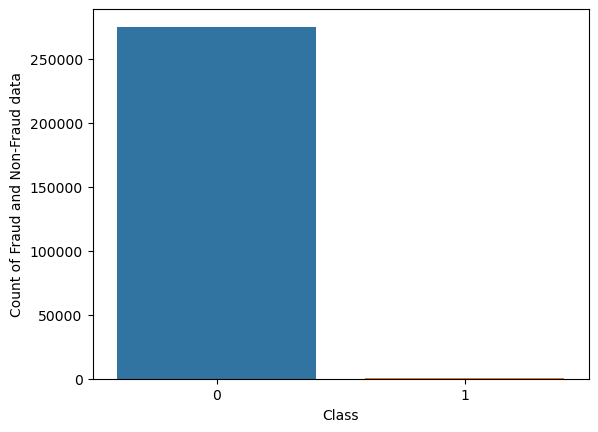

In [26]:
#visualizing the distribution of 0 and 1 using seaborn countplot
sns.countplot(ccfd,x = ccfd['Class'])
plt.xlabel('Class')
plt.ylabel('Count of Fraud and Non-Fraud data')
plt.show()

From the above information, We can say that our data is high imbalanced, so need to apply oversampling and undersampling technique to train our model

### Storing feature matrix in X and response (Target) in vector y

In [27]:
ccfd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [28]:
X = ccfd.drop('Class',axis = 1)

In [29]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313249


In [30]:
y = ccfd.Class

In [31]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64

### Splitting the dataset into the training set and test set

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [34]:
X_train.shape

(220530, 29)

### Training into the Model

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
LR = LogisticRegression()

In [37]:
LR.fit(X_train,y_train)

LogisticRegression()

### Evaluating the accuracy_score, precision_score 

In [38]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [39]:
y_pred = LR.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.9992200678359603

In [41]:
precision_score(y_test,y_pred)

0.8870967741935484

In [42]:
recall_score(y_test,y_pred)

0.6043956043956044

Here, precision_score is very low so we have to perform the oversampling and undersampling technique

### Handling Imbalanced dataset

In [43]:
#undersampling
#oversampling

### Undersampling

In [44]:
fraud = ccfd[ccfd['Class'] == 1]
normal = ccfd[ccfd['Class'] == 0]

In [45]:
fraud.shape

(473, 30)

In [46]:
normal.shape

(275190, 30)

In [47]:
#selecting the 473 necessary samples to balance the class feature
equal_sample = normal.sample(n=473)

In [48]:
equal_sample.shape

(473, 30)

In [49]:
new_ccfd = pd.concat([equal_sample,fraud],ignore_index = True)

In [50]:
new_ccfd['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [51]:
new_ccfd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amounts
0,-0.336788,1.163361,1.303065,0.057596,0.057744,-0.975195,0.735047,-0.093024,-0.447421,-0.521226,-0.151924,0.104799,0.463073,-0.498308,0.855651,0.365993,-0.011054,-0.181767,-0.093439,0.132836,-0.260623,-0.660489,-0.021886,0.343854,-0.149540,0.070723,0.248373,0.098895,0,-0.344114
1,-0.800695,0.799269,-0.744820,-1.097408,2.233199,3.195583,-0.096211,1.136893,-1.016504,-0.396015,-0.236214,-0.235402,0.049533,0.778004,1.365671,-0.005998,-0.156522,0.148342,1.618682,0.140550,0.014732,-0.278326,-0.155634,1.083952,0.067821,1.135265,-0.239820,0.011449,0,-0.254717
2,-0.641539,0.530215,1.518416,-0.893933,0.164667,0.391822,0.281905,0.086762,0.583567,-0.008753,0.550619,0.165922,-0.776726,-0.331107,-0.543521,0.347121,-0.840175,0.628966,-0.134016,0.055759,0.221541,0.879586,-0.212959,0.741105,-0.432566,0.450146,-0.079244,0.006808,0,-0.307251
3,-0.118310,0.923913,-0.947681,-1.132053,1.470516,-1.236531,1.658472,-0.382232,-0.414567,-0.502179,-0.982848,-0.152541,-0.187237,0.703968,-0.079123,-0.661547,-0.416161,-0.389693,-0.151624,0.026960,0.259797,0.866025,-0.153458,0.654411,-0.273203,0.064202,0.382645,0.277870,0,-0.257275
4,-0.783212,1.886366,1.434549,2.937871,-0.082150,-0.675020,0.894349,0.131387,-2.385541,0.346721,0.017869,0.382102,1.158685,0.646442,0.791580,-0.505355,0.482965,-0.393543,0.747580,0.149954,0.154970,0.322433,-0.198369,0.963121,0.430752,0.317778,-0.078871,0.022536,0,-0.223132


<Axes: xlabel='Class', ylabel='count'>

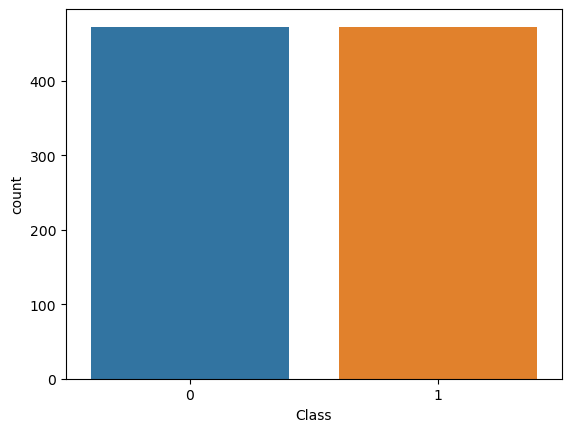

In [52]:
sns.countplot(x = new_ccfd['Class'],data=new_ccfd)

Now we equalized the Class feature

In [53]:
X = new_ccfd.drop('Class',axis = 1)

In [54]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amounts
0,-0.336788,1.163361,1.303065,0.057596,0.057744,-0.975195,0.735047,-0.093024,-0.447421,-0.521226,-0.151924,0.104799,0.463073,-0.498308,0.855651,0.365993,-0.011054,-0.181767,-0.093439,0.132836,-0.260623,-0.660489,-0.021886,0.343854,-0.149540,0.070723,0.248373,0.098895,-0.344114
1,-0.800695,0.799269,-0.744820,-1.097408,2.233199,3.195583,-0.096211,1.136893,-1.016504,-0.396015,-0.236214,-0.235402,0.049533,0.778004,1.365671,-0.005998,-0.156522,0.148342,1.618682,0.140550,0.014732,-0.278326,-0.155634,1.083952,0.067821,1.135265,-0.239820,0.011449,-0.254717
2,-0.641539,0.530215,1.518416,-0.893933,0.164667,0.391822,0.281905,0.086762,0.583567,-0.008753,0.550619,0.165922,-0.776726,-0.331107,-0.543521,0.347121,-0.840175,0.628966,-0.134016,0.055759,0.221541,0.879586,-0.212959,0.741105,-0.432566,0.450146,-0.079244,0.006808,-0.307251
3,-0.118310,0.923913,-0.947681,-1.132053,1.470516,-1.236531,1.658472,-0.382232,-0.414567,-0.502179,-0.982848,-0.152541,-0.187237,0.703968,-0.079123,-0.661547,-0.416161,-0.389693,-0.151624,0.026960,0.259797,0.866025,-0.153458,0.654411,-0.273203,0.064202,0.382645,0.277870,-0.257275
4,-0.783212,1.886366,1.434549,2.937871,-0.082150,-0.675020,0.894349,0.131387,-2.385541,0.346721,0.017869,0.382102,1.158685,0.646442,0.791580,-0.505355,0.482965,-0.393543,0.747580,0.149954,0.154970,0.322433,-0.198369,0.963121,0.430752,0.317778,-0.078871,0.022536,-0.223132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206024
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350191
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626302


In [55]:
y = new_ccfd.Class

In [56]:
y

0      0
1      0
2      0
3      0
4      0
      ..
941    1
942    1
943    1
944    1
945    1
Name: Class, Length: 946, dtype: int64

### Again Splitting the data for training and testing 

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [58]:
X_train.shape

(756, 29)

### Logistis Regression

In [59]:
LR.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred1 = LR.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred1)

0.9210526315789473

In [62]:
precision_score(y_test,y_pred1)

0.9393939393939394

In [63]:
f1_score(y_test,y_pred1)

0.9253731343283583

### Decision Tree Classification

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
DTC = DecisionTreeClassifier()

In [66]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred2 = DTC.predict(X_test)

### Evaluating the precision_score, accuracy_score, f1_score

In [68]:
accuracy_score(y_test,y_pred2)

0.8736842105263158

In [69]:
precision_score(y_test,y_pred2)

0.8421052631578947

In [70]:
f1_score(y_test,y_pred2)

0.8888888888888888

### RandomForest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
RFC = RandomForestClassifier()

In [73]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
y_pred3 = RFC.predict(X_test)

### Evaluating the precision_Score, accuracy_score,f1_score

In [75]:
accuracy_score(y_test,y_pred3)

0.9368421052631579

In [76]:
precision_score(y_test,y_pred3)

0.9591836734693877

In [77]:
f1_score(y_test,y_pred3)

0.9400000000000001

### LightBGM

In [78]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [79]:
from lightgbm import LGBMClassifier

In [80]:
LGBM = LGBMClassifier()

In [81]:
LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 371, number of negative: 385
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000329 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7317
[LightGBM] [Info] Number of data points in the train set: 756, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.490741 -> initscore=-0.037041
[LightGBM] [Info] Start training from score -0.037041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [82]:
y_pred4 = LGBM.predict(X_test)

### Evaluating the precision_Score, accuracy_score,f1_score

In [83]:
accuracy_score(y_test,y_pred4)

0.9315789473684211

In [84]:
precision_score(y_test,y_pred4)

0.9494949494949495

In [85]:
f1_score(y_test,y_pred4)

0.9353233830845771

### Checking which model is performing better accuracy_score

In [86]:
stats = pd.DataFrame({'Model':['Logistic Regression','Decision Classifier','Random Forest','Light GBM'],
                    'Accuracy_score':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4)]})

In [87]:
stats

,Model,Accuracy_score
0,Logistic Regression,0.921053
1,Decision Classifier,0.873684
2,Random Forest,0.936842
3,Light GBM,0.931579


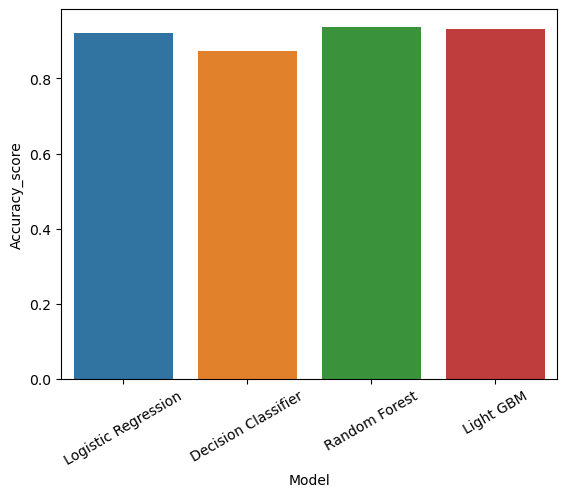

In [88]:

ax = sns.barplot(x = 'Model',y = 'Accuracy_score',data = stats)
plt.xticks(rotation=30)
plt.show()

As we are losting so much of feature information in undersampling, so move head to oversampling

### Oversampling

In [ ]:
pip install imbalanced-learn==0.10.1

In [89]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [90]:
from imblearn.over_sampling import SMOTE

In [119]:
x2 = ccfd.drop('Class',axis=1)

In [122]:
x2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amounts
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [120]:
y2 = ccfd.Class

In [121]:
y2

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 275663, dtype: int64

In [123]:
X_res,y_res = SMOTE().fit_resample(x2,y2)

In [124]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

### Again split the training and testing data

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size = 0.2,random_state=42)

### Train the Model

### Logistic Regression

In [130]:
#already imported
LR.fit(X_train,y_train)

LogisticRegression()

### Evaluating accuracy_score,precision_score,f1_score

In [131]:
accuracy_score(y_test,LR.predict(X_test))

0.9448926196446091

In [132]:
precision_score(y_test,LR.predict(X_test))

0.9733975661191402

In [133]:
f1_score(y_test,LR.predict(X_test))

0.9431436873183991

### Decision Tree Classifier

In [134]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

### Evaluating accuracy_Score,precision_Score,f1_score

In [137]:
accuracy_score(y_test,DTC.predict(X_test))

0.998128565718231

In [136]:
precision_score(y_test,DTC.predict(X_test))

0.9974400406688575

In [135]:
f1_score(y_test,DTC.predict(X_test))

0.9981286677204266

### Random Forest Classifier

In [138]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

### Evaluating accuracy_Score,precision_Score,f1_score

In [139]:
accuracy_score(y_test,RFC.predict(X_test))

0.999918238308078

In [140]:
precision_score(y_test,RFC.predict(X_test))

0.9998363993310551

In [141]:
f1_score(y_test,RFC.predict(X_test))

0.9999181929736854

### LightGBM

In [142]:
LGBM.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 220187, number of negative: 220117
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 440304, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500079 -> initscore=0.000318
[LightGBM] [Info] Start training from score 0.000318


LGBMClassifier()

### Evaluating accuracy_Score,precision_Score,f1_score

In [143]:
accuracy_score(y_test,LGBM.predict(X_test))

0.9991369599186017

In [144]:
precision_score(y_test,LGBM.predict(X_test))

0.9984386347131445

In [145]:
f1_score(y_test,LGBM.predict(X_test))

0.9991370147979253

In [150]:
stats_oversampling = pd.DataFrame({'Model':['Logistic Regression','Decision Classifier','Random Forest','Light GBM'],
                    'Accuracy_score':[accuracy_score(y_test,LR.predict(X_test))*100,accuracy_score(y_test,DTC.predict(X_test))*100,accuracy_score(y_test,RFC.predict(X_test))*100,accuracy_score(y_test,LGBM.predict(X_test))*100]})

In [151]:
stats_oversampling

,Model,Accuracy_score
0,Logistic Regression,94.489262
1,Decision Classifier,99.812857
2,Random Forest,99.991824
3,Light GBM,99.913696


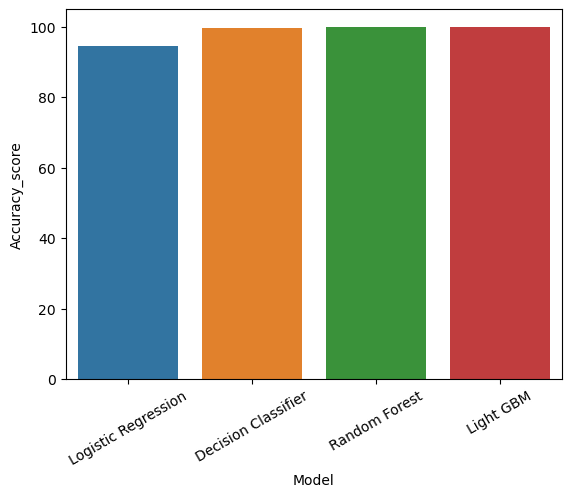

In [152]:
sns.barplot(x = 'Model',y = 'Accuracy_score',data = stats_oversampling)
plt.xticks(rotation=30)
plt.show()

### Since Random Forest and Light Gradient Boosting Machine is performing better 

In [153]:
import joblib

In [166]:
joblib.dump(RFC,"C:\\Users\\jnave\\OneDrive\\Documents\\IBM Applied Data Science\\CCFD MODEL.txt")

['C:\\Users\\jnave\\OneDrive\\Documents\\IBM Applied Data Science\\CCFD MODEL.txt']

In [157]:
model = joblib.load("C:\\Users\\jnave\\OneDrive\\Documents\\IBM Applied Data Science\\CCFD MODEL.txt")

In [165]:
predicted = model.predict([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1]])
if(predicted == 0):
    print("Normal Transaction")
else:
    print("Fraudlent Transaction")

Normal Transaction


C:\Users\jnave\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [167]:
import pickle

In [172]:
pickle.dump(RFC,open("C:\\Users\\jnave\\OneDrive\\Documents\\IBM Applied Data Science\\ccfd.txt","wb"))